In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [ ]:
df = pd.read_excel('Final Dataset1.xlsx', sheet_name='NIFTY')

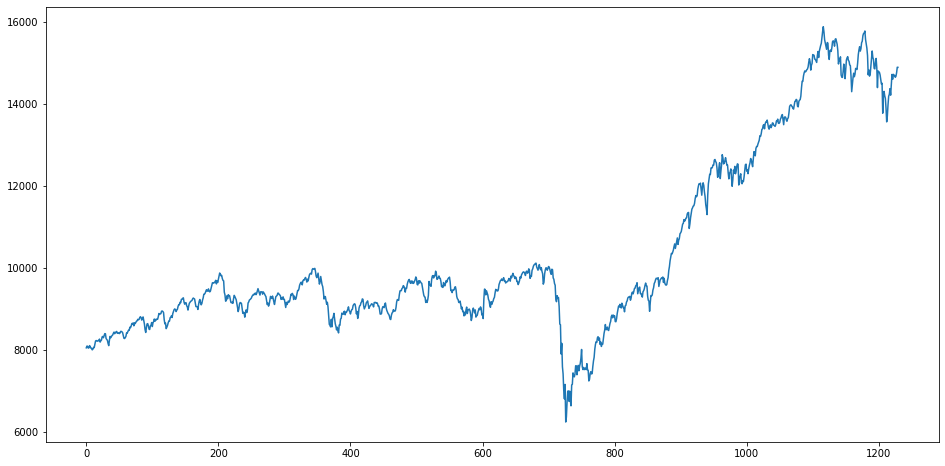

In [ ]:
data = nse.sort_index(ascending=True, axis=0)
plt.figure(figsize=(16,8))
plt.plot(nse['Close'], label='Close Price history')

In [ ]:
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

In [ ]:
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

In [ ]:
for i in range(0,len(data)):
     new_data['Date'][i] = data['Date'][i]
     new_data['Close'][i] = data['Close'][i]

In [ ]:
train = new_data[:984]
valid = new_data[984:]

In [ ]:
print('\n Shape of training set:')
print(train.shape)


 Shape of training set:
(984, 2)


In [ ]:
print('\n Shape of validation set:')
print(valid.shape)


 Shape of validation set:
(246, 2)


In [ ]:
preds = []
for i in range(0,valid.shape[0]):
    a = train['Close'][len(train)-283+i:].sum() + sum(preds)
    b = a/283
    preds.append(b)

In [ ]:
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-preds),2)))
print('\n RMSE value on validation set:')
print(rms)


 RMSE value on validation set:
3879.010556828276


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


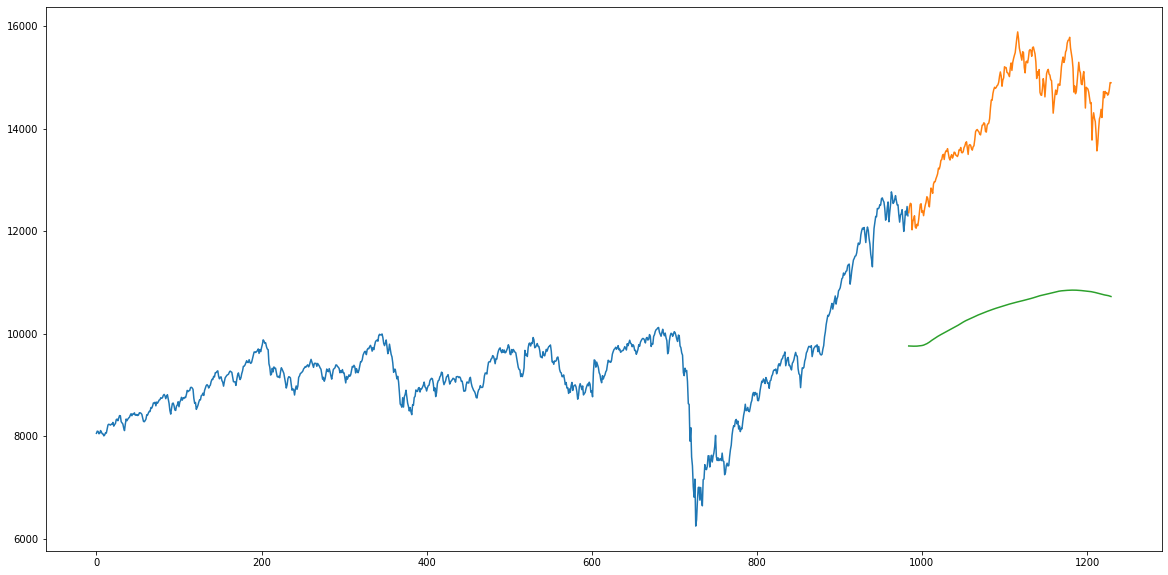

In [ ]:
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])

In [ ]:
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

In [ ]:
data = df.sort_index(ascending=True, axis=0)

In [ ]:
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

In [ ]:
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

In [ ]:
!pip install fastai

In [ ]:
new_data

,Date,Close
0,2017-04-03 00:00:00,8053.15
1,2017-04-05 00:00:00,8095.1
2,2017-04-06 00:00:00,8092.1
3,2017-04-07 00:00:00,8045.35
4,2017-04-10 00:00:00,8052.1
...,...,...
1225,2022-03-25 00:00:00,14651.7
1226,2022-03-28 00:00:00,14675.85
1227,2022-03-29 00:00:00,14761.9
1228,2022-03-30 00:00:00,14896.9


In [ ]:
from fastai.tabular.all import add_datepart

In [ ]:
add_datepart(new_data, 'Date')
new_data.drop('Elapsed', axis=1, inplace=True)  #elapsed will be the time stamp

In [ ]:
train

,Date,Close
0,2017-04-03 00:00:00,8053.15
1,2017-04-05 00:00:00,8095.1
2,2017-04-06 00:00:00,8092.1
3,2017-04-07 00:00:00,8045.35
4,2017-04-10 00:00:00,8052.1
...,...,...
979,2021-03-26 00:00:00,12148.9
980,2021-03-30 00:00:00,12387.9
981,2021-03-31 00:00:00,12313.7
982,2021-04-01 00:00:00,12479.0


In [ ]:
train = new_data[:984]
valid = new_data[984:]

In [ ]:
x_train = train.drop('Close', axis=1)
y_train = train['Close']
x_valid = valid.drop('Close', axis=1)
y_valid = valid['Close']

In [ ]:
x_train

,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start
0,2017,4,14,3,0,93,False,False,False,False,False,False
1,2017,4,14,5,2,95,False,False,False,False,False,False
2,2017,4,14,6,3,96,False,False,False,False,False,False
3,2017,4,14,7,4,97,False,False,False,False,False,False
4,2017,4,15,10,0,100,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
979,2021,3,12,26,4,85,False,False,False,False,False,False
980,2021,3,13,30,1,89,False,False,False,False,False,False
981,2021,3,13,31,2,90,True,False,True,False,False,False
982,2021,4,13,1,3,91,False,True,False,True,False,False


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
print(model.intercept_)

-832435.0658347016


In [ ]:
print(model.coef_)

[ 4.16956657e+02  2.60848511e+01 -5.15604103e+00 -2.28311000e+00
 -1.22645696e+00  2.84941614e-01  6.63083028e+01  1.37175100e+02
 -5.41489111e+02 -4.53919224e+02  1.01152868e+03  7.82035638e+02]


In [ ]:
ypred = model.predict(x_train)

In [ ]:
print(ypred)

[ 8618.31610552  8611.86685482  8608.64222947  8605.41760412
  8599.17288577  8595.94826042  8592.72363507  8589.49900972
  8580.02966603  8576.80504068  8573.58041533  8570.35578998
  8567.13116463  8560.88644628  8557.66182093  8554.43719558
  8551.21257023  8547.98794488  8633.09675238  8629.87212704
  8626.64750169  8623.42287634  8617.17815799  8613.95353264
  8610.72890729  8607.50428194  8604.27965659  8598.03493824
  8594.8103129   8591.58568755  8588.3610622   8585.13643685
  8578.8917185   8575.66709315  8572.4424678   8569.21784245
  8565.9932171   8559.74849876  8556.52387341  8619.6075509
  8784.11098379  8643.71125856  8637.46654021  8634.24191486
  8631.01728951  8627.79266416  8624.56803881  8618.32332046
  8615.09869512  8611.87406977  8608.64944442  8605.42481907
  8599.18010072  8595.95547537  8592.73085002  8589.50622467
  8586.28159932  8576.81225563  8573.58763028  8570.36300493
  8091.95757097  8655.47181243  8652.24718708  8649.02256173
  8645.79793638  8642.573

In [ ]:
from sklearn import metrics

In [ ]:
preds = model.predict(x_valid)
rms=np.sqrt(metrics.mean_squared_error(y_valid,preds))
rms

4001.5168514728157

In [ ]:
print(metrics.mean_absolute_error(y_valid,preds))

3890.8507313229484


In [ ]:
valid

,Close,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Predictions,empty_column
984,12358.1,2021,4,14,6,1,96,False,False,False,False,False,False,NaN,NaN
985,12481.3,2021,4,14,7,2,97,False,False,False,False,False,False,NaN,NaN
986,12541.65,2021,4,14,8,3,98,False,False,False,False,False,False,NaN,NaN
987,12527.4,2021,4,14,9,4,99,False,False,False,False,False,False,NaN,NaN
988,12024.1,2021,4,15,12,0,102,False,False,False,False,False,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225,14651.7,2022,3,12,25,4,84,False,False,False,False,False,False,NaN,NaN
1226,14675.85,2022,3,13,28,0,87,False,False,False,False,False,False,NaN,NaN
1227,14761.9,2022,3,13,29,1,88,False,False,False,False,False,False,NaN,NaN
1228,14896.9,2022,3,13,30,2,89,False,False,False,False,False,False,NaN,NaN


In [ ]:
valid = valid.drop('empty_column', axis=1)

In [ ]:
valid

,Close,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Predictions
984,12358.1,2021,4,14,6,1,96,False,False,False,False,False,False,NaN
985,12481.3,2021,4,14,7,2,97,False,False,False,False,False,False,NaN
986,12541.65,2021,4,14,8,3,98,False,False,False,False,False,False,NaN
987,12527.4,2021,4,14,9,4,99,False,False,False,False,False,False,NaN
988,12024.1,2021,4,15,12,0,102,False,False,False,False,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225,14651.7,2022,3,12,25,4,84,False,False,False,False,False,False,NaN
1226,14675.85,2022,3,13,28,0,87,False,False,False,False,False,False,NaN
1227,14761.9,2022,3,13,29,1,88,False,False,False,False,False,False,NaN
1228,14896.9,2022,3,13,30,2,89,False,False,False,False,False,False,NaN


In [ ]:
valid['Predictions'] = valid['Predictions'].replace(np.nan, 0)

In [ ]:
valid['Predictions'] = preds
valid.index = new_data[984:].index
train.index = new_data[:984].index

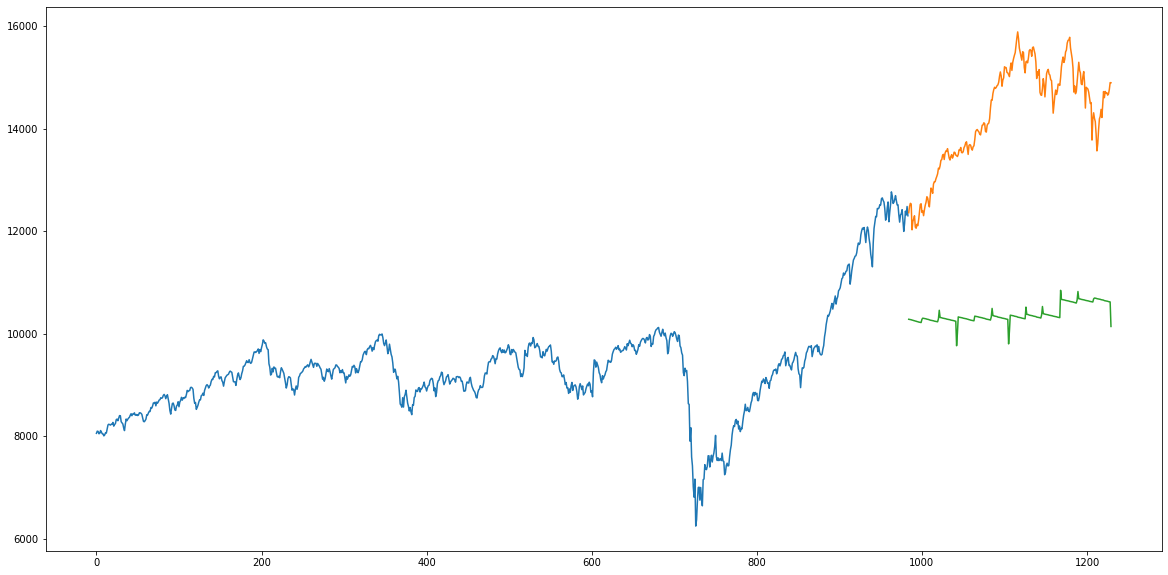

In [ ]:
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])

In [ ]:
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [ ]:
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)
x_valid_scaled = scaler.fit_transform(x_valid)
x_valid = pd.DataFrame(x_valid_scaled)

In [ ]:
params = {'n_neighbors':[3,5,7,9,11]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)

In [ ]:
model.fit(x_train,y_train)
preds = model.predict(x_valid)

In [ ]:
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms

4929.879481801125

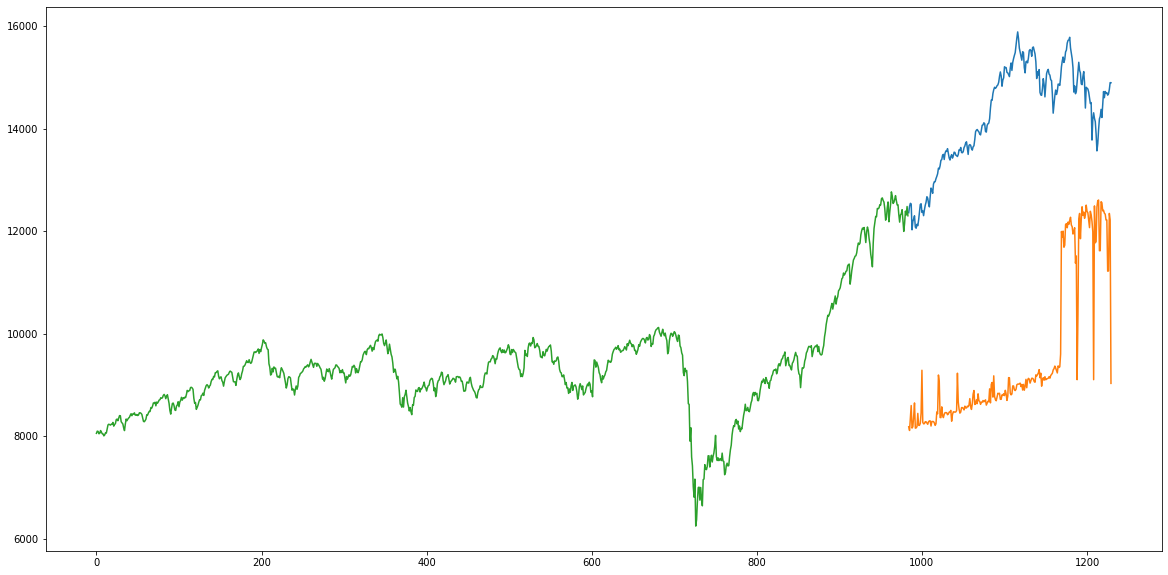

In [ ]:
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(valid[['Close', 'Predictions']])
plt.plot(train['Close'])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [ ]:
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

In [ ]:
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

In [ ]:
dataset = new_data.values

In [ ]:
train = dataset[0:984,:]
valid = dataset[984:,:]

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

In [ ]:
x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [ ]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

924/924 - 25s - loss: 0.0014 - 25s/epoch - 28ms/step


In [ ]:
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

In [ ]:
X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

In [ ]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

8/8 [==============================] - 0s 17ms/step


In [ ]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

261.41525902184134

In [ ]:
closing_price.shape

(246, 1)

In [ ]:
new_data

,Close
Date,
2017-04-03,8053.15
2017-04-05,8095.1
2017-04-06,8092.1
2017-04-07,8045.35
2017-04-10,8052.1
...,...
2022-03-25,14651.7
2022-03-28,14675.85
2022-03-29,14761.9


In [ ]:
train = new_data[:984]
valid = new_data[984:]

In [ ]:
valid

,Close,Predictions
Date,,
2021-04-06,12358.1,12117.561523
2021-04-07,12481.3,12153.366211
2021-04-08,12541.65,12201.736328
2021-04-09,12527.4,12259.257812
2021-04-12,12024.1,12312.957031
...,...,...
2022-03-25,14651.7,14651.032227
2022-03-28,14675.85,14686.129883
2022-03-29,14761.9,14700.714844


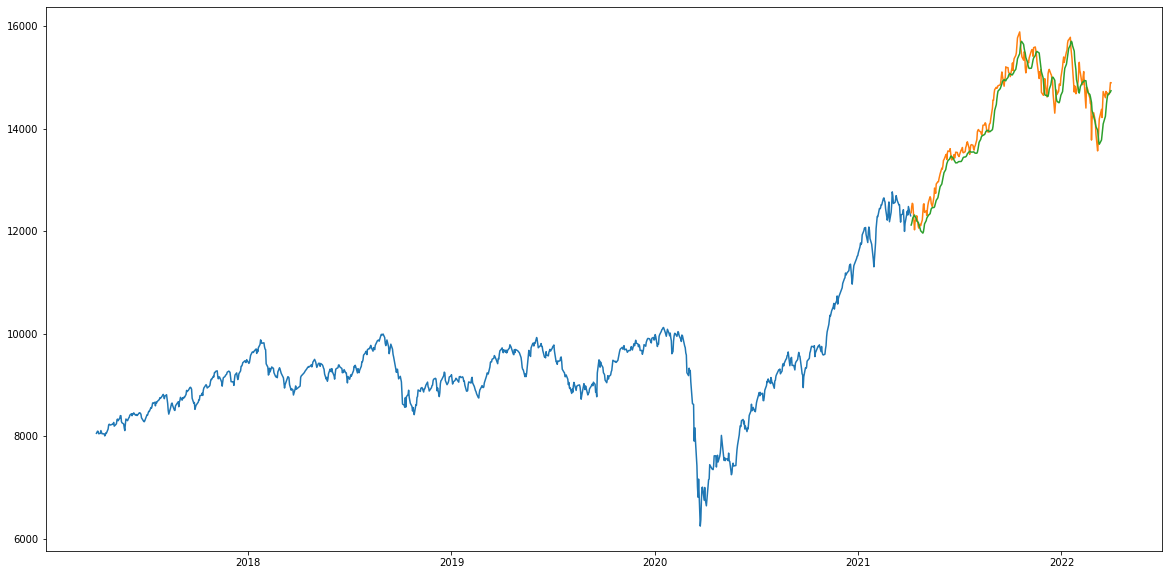

In [ ]:
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])